# 科学技術計算 第3回レポートソースコード



In [72]:
import numpy as np
from numpy.linalg import det, inv, matrix_rank, norm
from numpy import eye, identity, diag
rng = np.random.default_rng()

import scipy

from sklearn.datasets import load_iris

import sys
import psutil


import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["savefig.bbox"] = "tight"
plt.gray()


<Figure size 640x480 with 0 Axes>

## 課題03-1


In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

#行列の積の計算する関数

def my_mm(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    """行列積 ABを計算する関数

    引数:
        A (ndarray): m x n matrix
        B (ndarray): n x p matrix

    Returns:
        (ndarray): m x p matrix AB
    """
    #a,b が二次元行列であることを確認

    assert A.ndim == 2 and B.ndim == 2
    assert A.shape[1] == B.shape[0]

    #サイズを読み出し
    # print("A\n", A)
    #print("B\n", B)

    m, n = A.shape
    n, p  = B.shape

    C = np.zeros ((m, p))

    # 4*3 3*4の行列の積を計算
    for i in range (0, m):
        for j in range (0, p):
            for k in range (0, n):
                C[i][j] += A[i][k] * B[k][j]

    # print("C\n", C)

    return C
    

#以下は自作関数とライブラリの実行時間のプロットを作成するコード

for i in range(5):
    #行列のサイズ
    m = rng.integers(low=2, high=1000)
    n = rng.integers(low=2, high=1000)
    p = rng.integers(low=2, high=1000)
    A = rng.random(size=(m, n))
    B = rng.random(size=(n, p))

    print("A\n" ,A)
    print("B\n" ,B)

    #ライブラリの計算
    numpy_AB = A @ B

    #自作関数による計算
    my_AB = my_mm(A, B)
    print("my_AB\n" ,my_AB)

    assert np.allclose( #一致
        numpy_AB, my_AB
    ), "values doesn't match"

A
 [[0.70974492 0.79651253 0.84954348 ... 0.66854599 0.72500591 0.78944874]
 [0.25122687 0.64723943 0.0972914  ... 0.74355117 0.64713535 0.18485971]
 [0.04402379 0.66377313 0.90496276 ... 0.90931646 0.61013497 0.73291278]
 ...
 [0.4885968  0.77509604 0.57938034 ... 0.15688472 0.78496526 0.97638023]
 [0.69416792 0.79729174 0.78738776 ... 0.42972533 0.55685229 0.90223696]
 [0.42809744 0.11909929 0.03933435 ... 0.49868688 0.09877086 0.40503104]]
B
 [[0.83804628 0.44177747 0.81277235 ... 0.54226729 0.27328268 0.83025194]
 [0.17007421 0.76381704 0.28155452 ... 0.80159514 0.07905584 0.15211501]
 [0.33229212 0.03311804 0.64202386 ... 0.67368798 0.40483224 0.53516115]
 ...
 [0.65906175 0.45434139 0.24773743 ... 0.87422966 0.80044577 0.56448645]
 [0.53226811 0.22774403 0.7979622  ... 0.01226688 0.47532615 0.01150642]
 [0.1660749  0.77569787 0.23367419 ... 0.34051057 0.64755371 0.53026369]]
my_AB
 [[114.2765884  119.62820304 113.76999405 ... 118.76371431 111.07872293
  118.06790006]
 [113.611347

In [ ]:

for i in range(0,5):
    #行列のサイズ
    m = [2,5,10, 100,1000]
    n = [2,5,10, 100,1000]
    p = [2,5,10, 100,1000]
    A = rng.random(size=(m[i], n[i]))
    B = rng.random(size=(n[i], p[i]))

    #実行時間の計測
    print("CPU",m[i])
    %timeit numpy_inner_product = A @ B
    print("my",m[i])
    %timeit my_inner_product = my_mm(A, B)
    #計算し終わったから触らない！！

CPU 2
1.23 μs ± 30.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
my 2
6.11 μs ± 144 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
CPU 5
1.24 μs ± 16 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
my 5
74.9 μs ± 1.93 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
CPU 10
1.3 μs ± 28.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
my 10
555 μs ± 14.8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
CPU 100
60.9 μs ± 3.42 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
my 100
552 ms ± 10.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
CPU 1000
12.9 ms ± 108 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
my 1000
12min 16s ± 4min per loop (mean ± std. dev. of 7 runs, 1 loop each)


<Figure size 640x480 with 0 Axes>

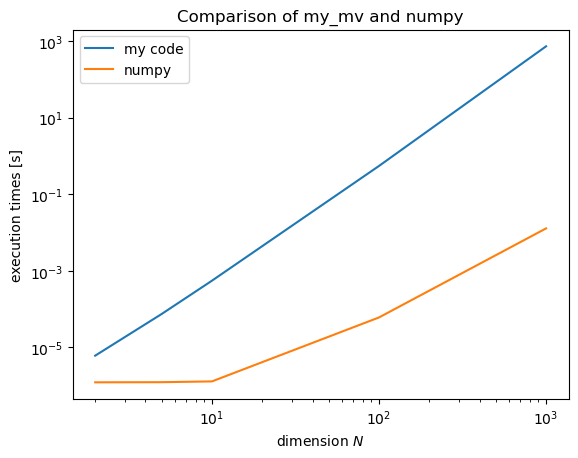

In [27]:

rcParams["savefig.bbox"] = "tight"
plt.gray()

n_list = [2, 5, 10, 100, 1000]

my_code_exec_times = [0.00000611, 0.0000749, 0.000555, 0.552, 736]  # dummy
numpy_exec_times = [0.00000123, 0.00000124, 0.0000013, 0.0000609, 0.0129]  # dummy

fig = plt.figure()
ax = fig.subplots()

ax.plot(n_list, my_code_exec_times, label="my code")
ax.plot(n_list, numpy_exec_times, label="numpy")

ax.set_title("Comparison of my_mv and numpy")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('dimension $N$')
ax.set_ylabel('execution times [s]')
ax.legend()

plt.plot()
fig.savefig("compare_my_mv.pdf")


## 課題03-3

In [28]:
# CSR形式の行列をもとの式に変換する関数の作成
def sparse_to_dense(A: scipy.sparse._csr.csr_array) -> np.ndarray:
    indptr = A.indptr
    indices = A.indices
    data = A.data
    
    #元の配列のサイズを特定したい
    n_rows, n_cols = A.shape
    answer = np.zeros((n_rows, n_cols))

    for i in range (0, len(indptr) - 1 ):
        for j in range (indptr[i],indptr[i + 1]):
            answer[i][indices[j]] = data[j]

    return answer


#やってみた
#ランダム生成する
a = scipy.sparse.random_array((5, 5), density=0.2, )
print(a)
print()

# CSR形式に変換
A_csr = scipy.sparse.csr_array(a)


#戻す
answer = sparse_to_dense(A_csr)
#コンピュータ側のやつ
true_dense = a.toarray()


print("自作関数の結果：\n", answer)
print()
print("SciPyの結果：\n", true_dense)


#結果を比較
print("一致しているか? →", np.allclose(answer, true_dense))


<COOrdinate sparse array of dtype 'float64'
	with 5 stored elements and shape (5, 5)>
  Coords	Values
  (0, 1)	0.7790870549170448
  (4, 4)	0.9560415895026815
  (2, 4)	0.5408752275683963
  (4, 0)	0.26877557241306205
  (1, 3)	0.8585185803284556

自作関数の結果：
 [[0.         0.77908705 0.         0.         0.        ]
 [0.         0.         0.         0.85851858 0.        ]
 [0.         0.         0.         0.         0.54087523]
 [0.         0.         0.         0.         0.        ]
 [0.26877557 0.         0.         0.         0.95604159]]

SciPyの結果：
 [[0.         0.77908705 0.         0.         0.        ]
 [0.         0.         0.         0.85851858 0.        ]
 [0.         0.         0.         0.         0.54087523]
 [0.         0.         0.         0.         0.        ]
 [0.26877557 0.         0.         0.         0.95604159]]
一致しているか? → True


## 課題03-4

In [172]:
#単位上三角行列判定
def is_upper_triangular( A: np.ndarray, atol: float = 1e-8, rtol: float = 1e-8,) -> bool:
    #要するに対角が1で下の要素が全部0であればいい
    #対角が1かをまず判定
    if(np.allclose(np.diag(A), 1, atol, rtol)):
        for i in range(1, n):
            if not(np.allclose(np.diag(A, k = -i), 0, atol, rtol)):
                return False
        else:
                return True
    else:
        return False
    
#上ヘッセンベルク行列判定
def is_upper_hessenberg( A: np.ndarray, atol: float = 1e-8, rtol: float = 1e-8,) -> bool:
    #要するに対角い越した以下が0であればいい
    for i in range(2, n):
        if not(np.allclose(np.diag(A, k = -i), 0, atol, rtol)):
            return False   
    else:         
        return True
#実行
#ランダムのやーつ
n = 5
A = rng.random(size=(n, n))
print("A\n", A)
print("Aは単位上三角行列か ->",is_upper_triangular(A))
print("Aは上ヘッセンベルク行列か ->",is_upper_hessenberg(A))
print()

#上三角行列を生成
A_tri_upper = np.triu(A)
print("upper triangular matrix\n", A_tri_upper)
print("Aは単位上三角行列か ->",is_upper_triangular(A_tri_upper))
print("Aは上ヘッセンベルク行列か ->",is_upper_hessenberg(A_tri_upper))
print()

#わかりやすい行列だよ
B = np.array([[1,2,3,4,5],
     [0,1,3,4,5],
     [0,0,1,4,5],
     [0,0,0,1,5],
     [0,10,0,0,1]])
print("B matrix\n",B)
print("Bは単位上三角行列か ->",is_upper_triangular(B))
print("Bは上ヘッセンベルク行列か ->",is_upper_hessenberg(B))
print()

#上三角行列を生成
A_tri_tani_upper = np.triu(A)
np.fill_diagonal(A_tri_tani_upper, 1)
print("upper tani triangular matrix\n", A_tri_tani_upper)
print("Aは単位上三角行列か ->",is_upper_triangular(A_tri_tani_upper))
print("Aは上ヘッセンベルク行列か ->",is_upper_hessenberg(A_tri_tani_upper))
print()

#上ヘッセンベルクだよ
A_upper_hessenberg = np.triu(A, k=-1)
print("upper Hessenbrerg matrix\n", A_upper_hessenberg)
print("Aは上三角行列か ->\n",is_upper_triangular(A_upper_hessenberg))
print("Aは上ヘッセンベルク行列か ->",is_upper_hessenberg(A_upper_hessenberg))





A
 [[0.36120944 0.09708664 0.51093833 0.03046645 0.38993994]
 [0.41209796 0.98835302 0.14855196 0.80909799 0.128218  ]
 [0.84798785 0.50746525 0.87033755 0.93491136 0.44816159]
 [0.48530231 0.71511643 0.68474405 0.66940809 0.46289694]
 [0.2114649  0.76787082 0.48361928 0.42200012 0.76178458]]
Aは単位上三角行列か -> False
Aは上ヘッセンベルク行列か -> False

upper triangular matrix
 [[0.36120944 0.09708664 0.51093833 0.03046645 0.38993994]
 [0.         0.98835302 0.14855196 0.80909799 0.128218  ]
 [0.         0.         0.87033755 0.93491136 0.44816159]
 [0.         0.         0.         0.66940809 0.46289694]
 [0.         0.         0.         0.         0.76178458]]
Aは単位上三角行列か -> False
Aは上ヘッセンベルク行列か -> True

B matrix
 [[ 1  2  3  4  5]
 [ 0  1  3  4  5]
 [ 0  0  1  4  5]
 [ 0  0  0  1  5]
 [ 0 10  0  0  1]]
Bは単位上三角行列か -> False
Bは上ヘッセンベルク行列か -> False

upper tani triangular matrix
 [[1.         0.09708664 0.51093833 0.03046645 0.38993994]
 [0.         1.         0.14855196 0.80909799 0.128218  ]
 [0.        

## 課題03-5

In [ ]:
def row_scale(A: np.ndarray, i: int, alpha: float) -> np.ndarray:
  """行を定数倍する関数（非破壊版）変更した行列を返す行列Aは変更されない"""
  B = A.copy()     # コピーを作る
  I_ic = np.eye(len(A))
  I_ic[i, i] = alpha
  """
  print("I_ic\n", I_ic)
  print("I_ic A\n", I_ic @ A)  # 行 i を c 倍
  """
  B = I_ic @ A
  return B

def row_scale_inplace(A: np.ndarray, i: int, alpha: float) -> None:
  """行を定数倍する関数（in-place版）行列Aを直接変更する 返り値を持たない"""
  A[i] *= alpha
  return None


def row_swap(A: np.ndarray, i: int, j: int) -> np.ndarray:
  """行 i と行 j を置換する関数(非破壊版)変更した行列を返す行列Aは変更されない"""
  B = A.copy()
  #print("A\n", A)
  M = np.eye(len(A))
  M[i, i] = 0
  M[j, j] = 0
  M[i, j] = 1
  M[j, i] = 1
  """
  print("M\n", M)
  print("M A\n", M @ A)  # 行 p と q の入れ替え
  """
  B = M @ A
  return B

def row_swap_inplace(A: np.ndarray, i: int, j: int) -> None:
  """行 i と行 j を置換する関数(in-place版）行列Aを直接変更する 返り値を持たない"""
  A[[i, j]] = A[[j, i]] 
  return None

def row_axpy(A: np.ndarray, i: int, j: int, alpha: float, beta: float, gamma: float, delta: float) ->np.ndarray:
  #行 i を alpha * 行i + beta * 行jに,行 j を gamma * 行i + delta * 行jにする.
  B = A.copy()

  row_i_old = A[i, :]
  row_j_old = A[j, :]

  B[i, :] = alpha * row_i_old + beta  * row_j_old
  B[j, :] = gamma * row_i_old + delta * row_j_old

  return B

def row_axpy_inplace(A: np.ndarray, i: int, j: int, alpha: float, beta: float, ganmma: float, delta: float) -> None:
  #行 i を alpha * 行i + beta * 行jに,行 j を gamma * 行i + delta * 行jにする.(in-place版）
  row_i_old = A[i, :].copy()   # 元の行 i
  row_j_old = A[j, :].copy()   # 元の行 j

  A[i, :] = alpha * row_i_old + beta  * row_j_old
  A[j, :] = gamma * row_i_old + delta * row_j_old
  return None



def col_scale(A: np.ndarray, i: int, alpha: float) -> np.ndarray:
  """列を定数倍する関数（非破壊版）変更した行列を返す行列Aは変更されない"""
  
  B = A.copy()     # コピーを作る
  I_ic = np.eye(len(A))
  I_ic[i, i] = alpha
  """
  print("I_ic\n", I_ic)
  print("A I_ic\n", A @ I_ic)  # 列 i を c 倍
  """
  B = A @ I_ic
  return B


def col_scale_inplace(A: np.ndarray, i: int, alpha: float) -> None:
  """列を定数倍する関数（in-place版）行列Aを直接変更する 返り値を持たない"""
  A[:, i] *= alpha
  return None

def col_swap(A: np.ndarray, i: int, j: int) -> np.ndarray:
  """列 i と列 j を置換する関数(非破壊版)変更した行列を返す行列Aは変更されない"""
  B = A.copy()
  #print("A\n", A)
  M = np.eye(A.shape[1])
  M[i, i] = 0
  M[j, j] = 0
  M[i, j] = 1
  M[j, i] = 1
  """
  print("M\n", M)
  print("A M\n", A @ M)  # 列 p と q の入れ替え
  """
  B = A @ M
  return B

def col_swap_inplace(A: np.ndarray, i: int, j: int) -> None:
  """列 i と列 j を置換する関数(in-place版）行列Aを直接変更する 返り値を持たない"""
  A[:, [i, j]] = A[:, [j, i]]
  return None

def col_axpy(A: np.ndarray, i: int, j: int, alpha: float, beta: float, gamma: float, delta: float) ->np.ndarray:
  #列 i を alpha * 列i + beta * 列jに,列 j を gamma * 列i + delta * 行jにする.
  
  B = A.copy()
  col_i_old = A[:, i]
  col_j_old = A[:, j]

  B[:, i] = alpha * col_i_old + beta * col_j_old
  B[:, j] = gamma * col_i_old + delta * col_j_old

  return B

def col_axpy_inplace(A: np.ndarray, i: int, j: int, alpha: float, beta: float, ganmma: float, delta: float) -> None:
  #列 i を alpha * 列i + beta * 列jに,列 j を gamma * 列i + delta * 行jにする.(in-place版)
  col_i_old = A[:, i].copy()   # 元の列 i を保存
  col_j_old = A[:, j].copy()   # 元の列 j を保存

  A[:, i] = alpha * col_i_old + beta  * col_j_old
  A[:, j] = gamma * col_i_old + delta * col_j_old
  return None


n = 5
A = rng.random(size=(n, n))

print("A =\n" ,A)

alpha = 2
beta = 1
gamma = 2
delta = 5
i = 2
j = 3
k = 4

#行操作
print("row_scale\n",row_scale(A, i, alpha)) #行iをalpha倍
print()
print("row_scale_inplace",row_scale_inplace(A, i, alpha))
print(A)
print("row_scale\n",row_scale(A, i, alpha)) #行iをalpha倍
print()


n = 5
A = rng.random(size=(n, n))
print("A =\n" ,A)

print("row_swap\n", row_swap(A, i, j)) #行 i と行 j を置換する
print()
print("row_swap_inplace\n",row_swap_inplace(A, i, j))
print(A)
print("row_swap\n", row_swap(A, i, j)) #行 i と行 j を置換する
print()


n = 5
A = rng.random(size=(n, n))
print("A =\n" ,A)

print(row_axpy(A, i, j, alpha, beta, gamma, delta))  #行 i を alpha * 行 i + beta * 行 j に，行 j を gamma * 行 i + delta * 行jにする．
print()
row_axpy_inplace(A, i, j, alpha, beta, gamma, delta)
print(A)
print(row_axpy(A, i, j, alpha, beta, gamma, delta))  #行 i を alpha * 行 i + beta * 行 j に，行 j を gamma * 行 i + delta * 行jにする．
print()


#列操作（以下同様）

n = 5
A = rng.random(size=(n, n))
print("A =\n" ,A)

print("col_scale\n",col_scale(A, i, alpha)) #行iをalpha倍
print()
print("col_scale_inplace",col_scale_inplace(A, i, alpha))
print(A)
print("col_scale\n",col_scale(A, i, alpha)) #行iをalpha倍
print()

n = 5
A = rng.random(size=(n, n))
print("A =\n" ,A)

print("col_swap\n", col_swap(A, i, j)) #列 i と列 j を置換する
print()
print("col_swap_inplace\n",col_swap_inplace(A, i, j))
print(A)
print("col_swap\n", col_swap(A, i, j)) #列 i と列 j を置換する
print()

n = 5
A = rng.random(size=(n, n))
print("A =\n" ,A)

print("col_axpy\n",col_axpy(A, i, j, alpha, beta, gamma, delta))  #列 i を alpha * 列 i + beta * 列 j に，行 j を gamma * 列 i + delta * 列jにする．
print()
print("col_axpy_inplace\n",col_axpy_inplace(A, i, j, alpha, beta, gamma, delta))
print(A)
print("col_axpy\n",col_axpy(A, i, j, alpha, beta, gamma, delta))  #列 i を alpha * 列 i + beta * 列 j に，行 j を gamma * 列 i + delta * 列jにする．
print()




A =
 [[0.10697645 0.55787988 0.61883169 0.75897576 0.6432531 ]
 [0.62692667 0.46756794 0.42274748 0.50420321 0.54114282]
 [0.51970615 0.36019001 0.51816072 0.39244666 0.45370231]
 [0.67342661 0.75719158 0.40247333 0.87590668 0.7340864 ]
 [0.89503677 0.80626965 0.78134647 0.0787148  0.84589685]]
row_scale
 [[0.10697645 0.55787988 0.61883169 0.75897576 0.6432531 ]
 [0.62692667 0.46756794 0.42274748 0.50420321 0.54114282]
 [1.03941231 0.72038003 1.03632144 0.78489333 0.90740461]
 [0.67342661 0.75719158 0.40247333 0.87590668 0.7340864 ]
 [0.89503677 0.80626965 0.78134647 0.0787148  0.84589685]]

row_scale_inplace None
[[0.10697645 0.55787988 0.61883169 0.75897576 0.6432531 ]
 [0.62692667 0.46756794 0.42274748 0.50420321 0.54114282]
 [1.03941231 0.72038003 1.03632144 0.78489333 0.90740461]
 [0.67342661 0.75719158 0.40247333 0.87590668 0.7340864 ]
 [0.89503677 0.80626965 0.78134647 0.0787148  0.84589685]]
row_scale
 [[0.10697645 0.55787988 0.61883169 0.75897576 0.6432531 ]
 [0.62692667 0.467